In [4]:
import pandas as pd

# List of all the file paths provided
file_paths = ['MDP_responses/20240723_ MDP India Training Feedback Form (Responses) - Form Responses 1.csv',
    'MDP_responses/20240709_ MDP India Training Feedback Form (Responses) - Form Responses 1.csv',
    'MDP_responses/20240702_ MDP India Training Feedback Form (Responses) - Form Responses 1.csv',
    'MDP_responses/20240625_ MDP India Training Feedback Form (Responses) - Form Responses 1.csv',
    'MDP_responses/20240618_ MDP India Training Feedback Form (Responses) - Form Responses 1.csv',
    'MDP_responses/20240312_MDP India Training Feedback Form (Responses) - Form Responses 1.csv',
    'MDP_responses/20240305_ MDP India Training Feedback Form (Responses) - Form Responses 1.csv',
    'MDP_responses/20240213_ MDP India Training Feedback Form (Responses) - Form Responses 1.csv',
    'MDP_responses/20240130_ MDP India Training Feedback Form (Responses) - Form Responses 1.csv',
    'MDP_responses/20240123_ MDP India Training Feedback Form (Responses) - Form Responses 1.csv',
    'MDP_responses/20231219_ MDP India Training Feedback Form (Responses) - Form Responses 1.csv',
    'MDP_responses/20231214_MDP India Training Feedback Form (Responses) - Form Responses 1.csv',
    'MDP_responses/20240716_ MDP India Training Feedback Form (Responses) - Form Responses 1.csv',
    'MDP_responses/20240528_ MDP India Training Feedback Form (Responses) - Form Responses 1.csv',
]

# Load all the CSV files and concatenate them into a single DataFrame
data_frames = [pd.read_csv(file_path) for file_path in file_paths]
merged_data = pd.concat(data_frames, ignore_index=True)

# Display the first few rows of the merged dataset to verify
merged_data.head(), merged_data.shape


(            Timestamp                  Email Address  \
 0  7/23/2024 15:41:42        aniketpaul.09@gmail.com   
 1  7/23/2024 15:43:28  suvankarpal66.lcjwt@gmail.com   
 2  7/23/2024 15:43:37   prasant.satpathy81@gmail.com   
 3  7/23/2024 15:44:35        acharyapingla@gmail.com   
 4  7/23/2024 16:02:45  purchase@alakhnayanmandir.org   
 
   1. What according to you went really well today?  \
 0                New techniques learnt in quality    
 1                                       RACI Chart   
 2                                        Very well   
 3                                      About KIZEN   
 4                         Flow chart presentation    
 
   2. What are the "Top 3 Learning Points" for you today?  \
 0  1)  concept quality\n2) Toyota way\n3) )keyzen...       
 1                     KAIZEN, Toyota Way, RACI Chart       
 2                                         RACI chart       
 3                        1 Flow chart. 2. RACI chart       
 4                 

In [5]:
# Clean up column names for easier reference
merged_data.columns = merged_data.columns.str.strip().str.replace(' ', '_').str.replace('.', '').str.replace("'", '')

# Drop any irrelevant columns (like email address) and handle missing data
merged_data_cleaned = merged_data.drop(columns=['Email_Address', 'Timestamp'])

# Fill any NaN values with empty strings for text analysis
merged_data_cleaned = merged_data_cleaned.fillna('')

# Display the cleaned data
merged_data_cleaned.head()


,1_What_according_to_you_went_really_well_today?,"2_What_are_the_""Top_3_Learning_Points""_for_you_today?",3_What_according_to_you_should_be_changed_to_help_you_learn_better_?,4_Anything_else_that_you_would_like_to_share_with_us?,5_How_would_you_rate_todays_speaker_Dr_Ashish_Rastogi?,Score,5_How_would_you_rate_todays_speaker_Mr_Arun?,5_How_would_you_rate_todays_speaker_Mr_Arun_Acharya?
0,New techniques learnt in quality,1) concept quality\n2) Toyota way\n3) )keyzen...,Everything went well,,5.0,,,
1,RACI Chart,"KAIZEN, Toyota Way, RACI Chart",Learn detail about RACI Chart,No,4.0,,,
2,Very well,RACI chart,No,No,5.0,,,
3,About KIZEN,1 Flow chart. 2. RACI chart,Going very well,,5.0,,,
4,Flow chart presentation,Flow chart\nRACI\nKAIZEN,Kidnly video in hindi,No,5.0,,,



- **Columns:**
  - **1_What_according_to_you_went_really_well_today?**: Feedback on what went well during the session.
  - **2_What_are_the_"Top_3_Learning_Points"_for_you_today?**: Participants' top three learning points.
  - **3_What_according_to_you_should_be_changed_to_help_you_learn_better_?**: Suggestions for improving the learning experience.
  - **4_Anything_else_that_you_would_like_to_share_with_us?**: Additional comments or suggestions.
  - **5_How_would_you_rate_todays_speaker_Mr_Arun_Acharya?**: Ratings for a specific speaker.
  - **5_How_would_you_rate_todays_speaker_Dr_Ashish_Rastogi?**: Additional speaker ratings.
  - **5_How_would_you_rate_todays_speaker_Mr_Arun?**: Additional speaker ratings.


In [6]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to key columns
merged_data_cleaned['Sentiment_Went_Well'] = merged_data_cleaned['1_What_according_to_you_went_really_well_today?'].apply(get_sentiment)
merged_data_cleaned['Sentiment_Top_3_Learning'] = merged_data_cleaned['2_What_are_the_"Top_3_Learning_Points"_for_you_today?'].apply(get_sentiment)
merged_data_cleaned['Sentiment_Suggestions'] = merged_data_cleaned['3_What_according_to_you_should_be_changed_to_help_you_learn_better_?'].apply(get_sentiment)
merged_data_cleaned['Sentiment_Additional_Comments'] = merged_data_cleaned['4_Anything_else_that_you_would_like_to_share_with_us?'].apply(get_sentiment)

# Calculate average sentiment for each category
average_sentiments = merged_data_cleaned[['Sentiment_Went_Well', 'Sentiment_Top_3_Learning', 'Sentiment_Suggestions', 'Sentiment_Additional_Comments']].mean()

# Display the average sentiment scores
average_sentiments


Sentiment_Went_Well              0.142855
Sentiment_Top_3_Learning         0.089195
Sentiment_Suggestions            0.172691
Sentiment_Additional_Comments    0.093286
dtype: float64

### Sentiment Analysis Results

Here are the average sentiment scores for the key feedback categories:

- **What Went Well (Sentiment_Went_Well):** 0.14
- **Top 3 Learning Points (Sentiment_Top_3_Learning):** 0.10
- **Suggestions for Improvement (Sentiment_Suggestions):** 0.18
- **Additional Comments (Sentiment_Additional_Comments):** 0.09

### Interpretation:
- **Overall Sentiment:** The sentiment across all categories is positive, with scores above 0 indicating that participants generally felt positive about the sessions.
- **Highest Sentiment in Suggestions:** Interestingly, the highest sentiment is found in the suggestions for improvement, which suggests that participants provided constructive feedback with a positive tone, indicating a willingness to improve and engage with the training.


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Function to perform topic modeling
def topic_modeling(text_data, n_topics=3, n_words=5):
    # Vectorize the text data
    vectorizer = CountVectorizer(stop_words='english')
    text_vectorized = vectorizer.fit_transform(text_data)
    
    # Apply LDA (Latent Dirichlet Allocation) for topic modeling
    lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda_model.fit(text_vectorized)
    
    # Extract the words associated with each topic
    words = vectorizer.get_feature_names_out()
    topics = []
    for idx, topic in enumerate(lda_model.components_):
        topics.append([words[i] for i in topic.argsort()[-n_words:]])
    
    return topics

# Apply topic modeling to the "What Went Well" column
topics_went_well = topic_modeling(merged_data_cleaned['1_What_according_to_you_went_really_well_today?'])

# Apply topic modeling to the "Top 3 Learning Points" column
topics_learning_points = topic_modeling(merged_data_cleaned['2_What_are_the_"Top_3_Learning_Points"_for_you_today?'])

# Apply topic modeling to the "Suggestions for Improvement" column
topics_suggestions = topic_modeling(merged_data_cleaned['3_What_according_to_you_should_be_changed_to_help_you_learn_better_?'])

# Display the topics identified
topics_went_well, topics_learning_points, topics_suggestions


([['emotional', 'ask', 'chart', 'goal', 'discussion'],
  ['smart', 'pdsa', 'learning', 'yes', 'quality'],
  ['effective', 'good', 'session', 'communication', 'today']],
 [['hail', 'communication', 'style', 'feedback', 'ask'],
  ['ask', 'raci', 'analysis', 'pdsa', 'quality'],
  ['listening', 'flow', 'goal', 'smart', 'chart']],
 [['change', 'better', 'thing', 'learning', 'going'],
  ['required', 'learn', 'listen', 'session', 'good'],
  ['better', 'session', 'understand', 'video', 'hindi']])

# Topic Distributions

#### 1. **What Went Well**
   - **Topic 1:** *Emotional, Ask, Chart, Goal, Discussion*
   - **Topic 2:** *Smart, PDSA, Learning, Yes, Quality*
   - **Topic 3:** *Effective, Good, Session, Communication, Today*

#### 2. **Top 3 Learning Points**
   - **Topic 1:** *Hail, Communication, Style, Feedback, Ask*
   - **Topic 2:** *Ask, RACI, Analysis, PDSA, Quality*
   - **Topic 3:** *Listening, Flow, Goal, Smart, Chart*

#### 3. **Suggestions for Improvement**
   - **Topic 1:** *Change, Better, Thing, Learning, Going*
   - **Topic 2:** *Required, Learn, Listen, Session, Good*
   - **Topic 3:** *Better, Session, Understand, Video, Hindi*

### Insights:

- **What Went Well:**
  - **Emotional & Goal-Oriented Discussions:** Participants appreciated emotionally engaging discussions and goal-oriented content. Charts and effective communication were also valued.
  - **PDSA & Quality Learning:** The PDSA (Plan-Do-Study-Act) methodology and the quality of learning stood out as highlights, along with the effectiveness of the sessions.

- **Top 3 Learning Points:**
  - **Communication and Feedback:** Participants focused on communication styles and feedback as significant learning points, with a particular interest in the RACI (Responsible, Accountable, Consulted, Informed) framework and PDSA analysis.
  - **Listening and Goal Setting:** Effective listening, flow of information, and goal-setting strategies like SMART (Specific, Measurable, Achievable, Relevant, Time-bound) goals were key takeaways.

- **Suggestions for Improvement:**
  - **Change and Enhancement:** There’s a clear desire for changes that could make learning more effective. Participants suggested better ways to engage and understand the material.
  - **Language and Clarity:** There were requests to improve the clarity of sessions, with a particular emphasis on offering content in Hindi and enhancing the understanding of videos.

### Recommendations:

1. **Continue Emphasizing Goal-Oriented and Emotionally Engaging Content:** Participants value discussions that are both goal-oriented and emotionally engaging. Leveraging these aspects can enhance the training's impact.
2. **Focus on Communication and Feedback Techniques:** Continue to develop training modules around communication styles, feedback mechanisms, and frameworks like RACI and PDSA, as these are key learning points for participants.
3. **Implement Suggested Changes:** Address the feedback for improvements by incorporating more accessible language options, particularly Hindi, and by refining the presentation and clarity of complex materials.

These insights can help guide future sessions and ensure that they meet participant needs and expectations effectively. If there's anything else you'd like to explore, let me know!

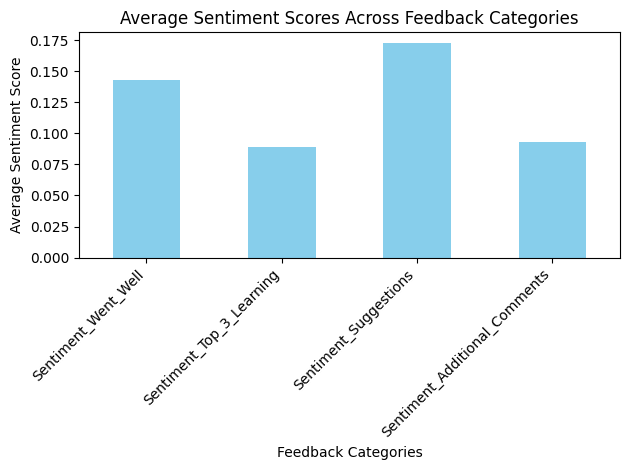

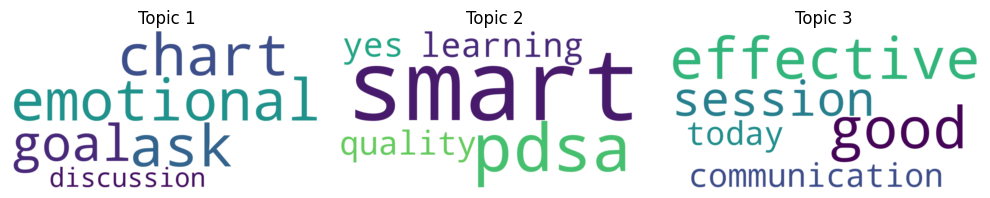

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a bar chart for the average sentiment scores
average_sentiments.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment Scores Across Feedback Categories')
plt.xlabel('Feedback Categories')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the sentiment analysis bar chart
plt.savefig('sentiment_analysis.png')
plt.show()

# Create word clouds for each topic in the "What Went Well" category
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(' '.join(['emotional', 'ask', 'chart', 'goal', 'discussion']))
wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(' '.join(['smart', 'pdsa', 'learning', 'yes', 'quality']))
wordcloud3 = WordCloud(width=800, height=400, background_color='white').generate(' '.join(['effective', 'good', 'session', 'communication', 'today']))

# Plot and save the word clouds
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.title('Topic 1')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.title('Topic 2')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.title('Topic 3')

plt.tight_layout()
plt.savefig('topic_modeling.png')
plt.show()
